<a href="https://colab.research.google.com/github/raulforreal/Data-Analysis-project/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, KBinsDiscretizer
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataGaia_AB_train 2.csv")

In [3]:
df.head()

,ID,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,...,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,SpType-ELS
0,1,1,44.375187,2.895901,1.400000e+15,1.8937,16.954,7.031,-15.427,10.369156,...,0.163792,NaN,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.638083,A
1,2,2,42.959304,2.920459,1.550000e+15,2.9732,2.528,1.795,1.780,10.038978,...,0.304139,NaN,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.507551,A
2,3,3,44.031079,3.203683,1.610000e+15,2.2337,10.776,-3.151,-10.305,9.810181,...,0.338961,1.5956,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.368294,A
3,4,4,45.463599,3.138095,1.750000e+15,4.0179,10.053,1.828,9.885,8.163041,...,0.091842,NaN,9982.8,251.2483,2.2829,45.868046,2.447,0.320,0.509338,A
4,5,5,43.784164,3.486814,2.060000e+15,11.6458,32.355,29.688,-12.863,6.855547,...,0.257051,NaN,7192.3,85.7073,2.0194,9.909233,1.647,1.288,0.459583,A


In [4]:
field_to_be_normalised = []
field_to_be_scaled_with_min_max_scaler = [
    "e_Gmag",
    "BPmag",
    "e_BPmag",
    "RPmag",
    "e_RPmag",
    "GRVSmag",
  "e_GRVSmag",
  "BP-RP",
  "BP-G",
  "G-RP",
  "pscol",
  "Dist",
  "Rad",
  "Lum-Flame",
  "Mass-Flame",
  "z-Flame"
]
field_to_be_scaled_with_standard_scaler = []
field_to_be_ordinal_encoded = []
fields_to_be_discretize = []

In [5]:
df = df.drop(["Unnamed: 0"], axis=1)

In [6]:
df.dtypes

ID              int64
RA_ICRS       float64
DE_ICRS       float64
Source        float64
Plx           float64
PM            float64
pmRA          float64
pmDE          float64
Gmag          float64
e_Gmag        float64
BPmag         float64
e_BPmag       float64
RPmag         float64
e_RPmag       float64
GRVSmag       float64
e_GRVSmag     float64
BP-RP         float64
BP-G          float64
G-RP          float64
pscol         float64
Teff          float64
Dist          float64
Rad           float64
Lum-Flame     float64
Mass-Flame    float64
Age-Flame     float64
z-Flame       float64
SpType-ELS     object
dtype: object

In [7]:
df["SpType-ELS"].value_counts()

SpType-ELS
A          80088
B          68450
Name: count, dtype: int64

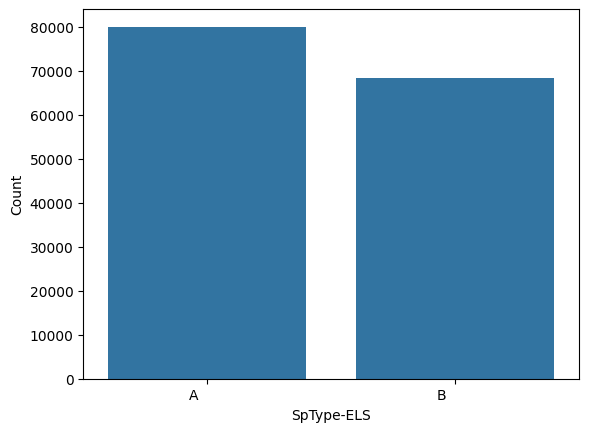

In [8]:
counts = df["SpType-ELS"].value_counts().reset_index()
fig, ax = plt.subplots()
sns.barplot(x=counts["SpType-ELS"], y=counts["count"], ax=ax)
ax.set_xlabel("SpType-ELS")
ax.set_ylabel("Count")
plt.show()

In [9]:
df["RA_ICRS"].describe()

count    148538.000000
mean        124.353753
std         115.895758
min           0.000345
25%          35.904057
50%          77.449781
75%         249.607253
max         359.997541
Name: RA_ICRS, dtype: float64

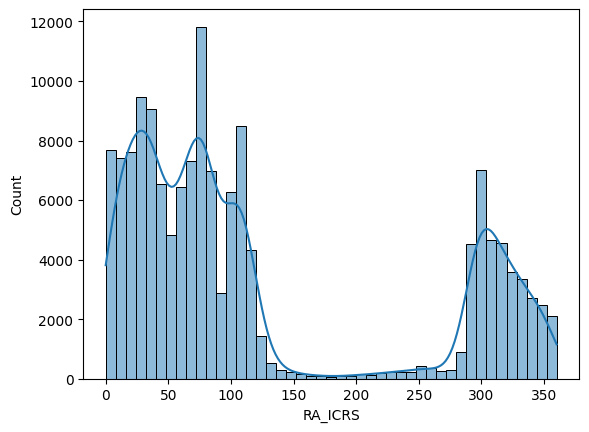

In [10]:
sns.histplot(df["RA_ICRS"], kde=True)
plt.show()

In [11]:
normalised_data = MinMaxScaler().fit_transform(df["RA_ICRS"].to_numpy().reshape(-1, 1))

In [12]:
field_to_be_scaled_with_min_max_scaler.append("RA_ICRS")

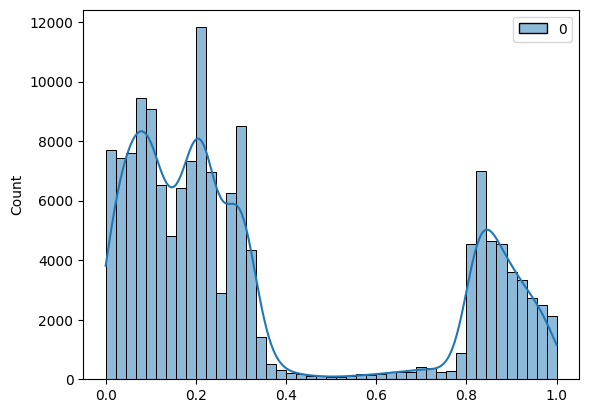

In [13]:
sns.histplot(normalised_data, kde=True)
plt.show()

In [14]:
df["DE_ICRS"].describe()

count    148538.000000
mean         41.767256
std          23.823111
min         -39.993690
25%          33.489786
50%          47.975644
75%          59.740895
max          89.774031
Name: DE_ICRS, dtype: float64

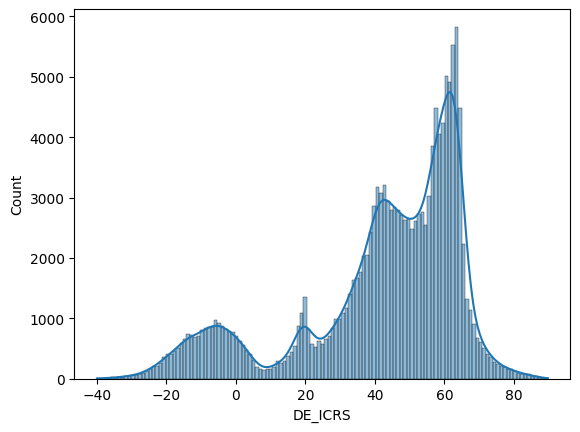

In [15]:
sns.histplot(df["DE_ICRS"], kde=True)
plt.show()

In [16]:
normalised_data = StandardScaler().fit_transform(df["DE_ICRS"].to_numpy().reshape(-1, 1))

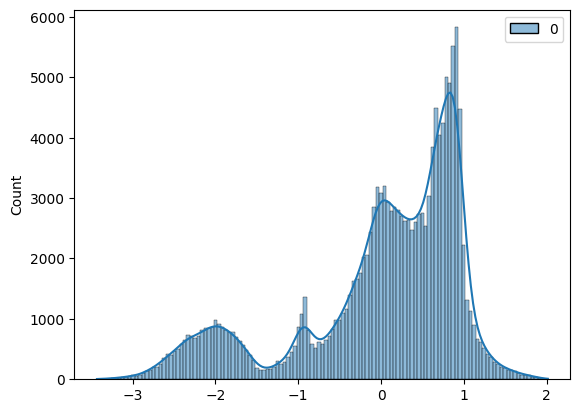

In [17]:
sns.histplot(normalised_data, kde=True)
plt.show()

In [18]:
field_to_be_scaled_with_standard_scaler.append("DE_ICRS")

In [19]:
len(set(df["Source"]))

1584

In [20]:
field_to_be_ordinal_encoded.append("Source")

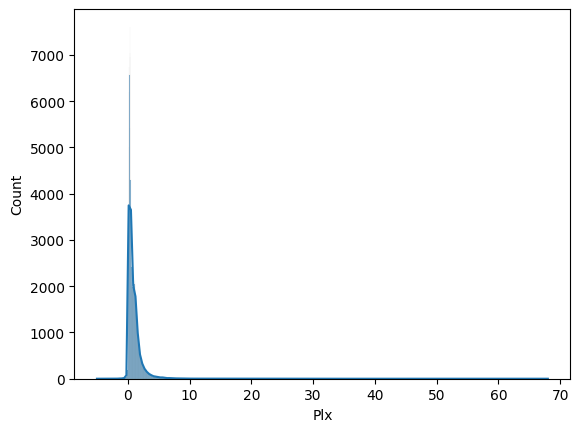

In [21]:
sns.histplot(df["Plx"], kde=True)
plt.show()

In [22]:
normalised_data = MinMaxScaler().fit_transform(df["Plx"].to_numpy().reshape(-1, 1))

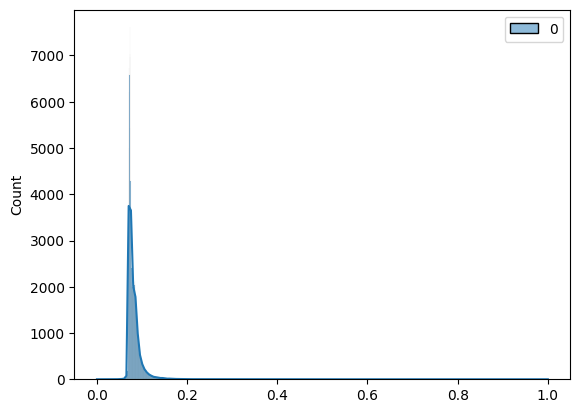

In [23]:
sns.histplot(normalised_data, kde=True)
plt.show()

In [24]:
field_to_be_scaled_with_min_max_scaler.append("Plx")

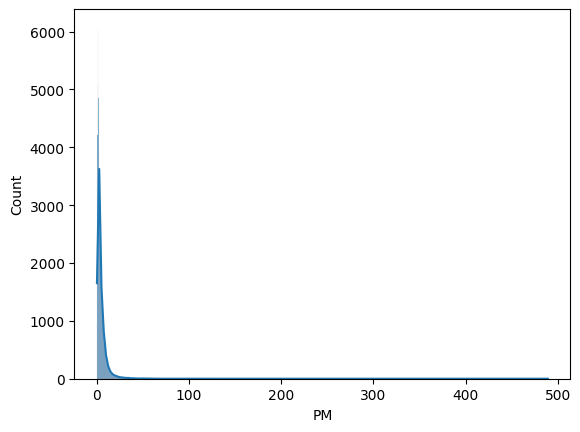

In [25]:
sns.histplot(df["PM"], kde=True)
plt.show()

In [26]:
normalised_data = MinMaxScaler().fit_transform(df["PM"].to_numpy().reshape(-1, 1))

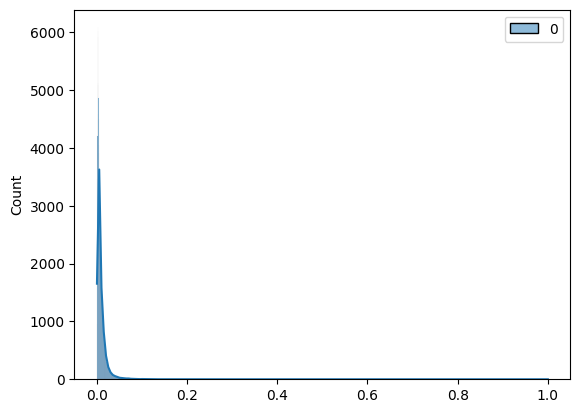

In [27]:
sns.histplot(normalised_data, kde=True)
plt.show()

In [28]:
field_to_be_scaled_with_min_max_scaler.append("PM")

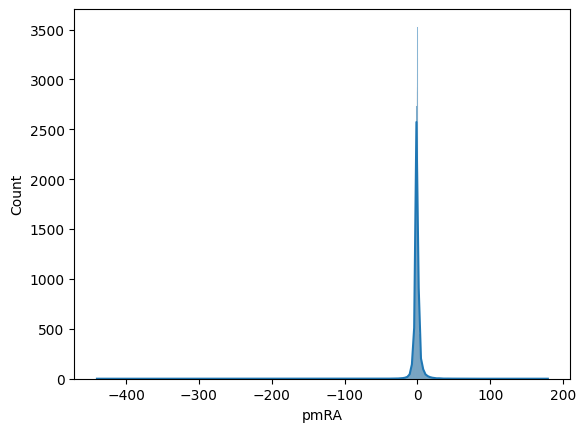

In [29]:
sns.histplot(df["pmRA"], kde=True)
plt.show()

In [30]:
normalised_data = MinMaxScaler().fit_transform(df["pmRA"].to_numpy().reshape(-1, 1))

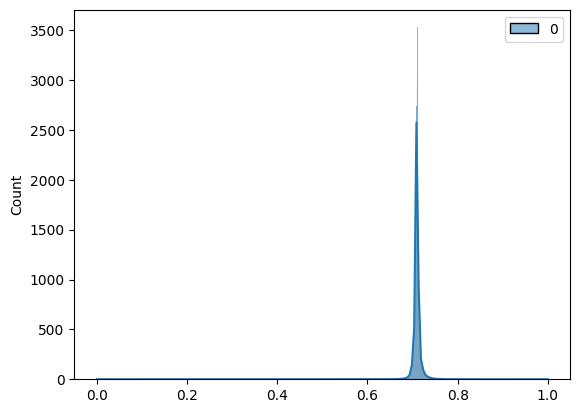

In [31]:
sns.histplot(normalised_data, kde=True)
plt.show()

In [32]:
field_to_be_scaled_with_min_max_scaler.append("pmRA")

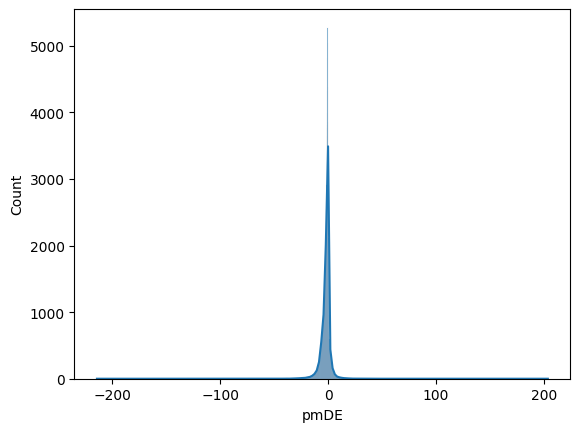

In [33]:
sns.histplot(df["pmDE"], kde=True)
plt.show()

In [34]:
normalised_data = MinMaxScaler().fit_transform(df["pmDE"].to_numpy().reshape(-1, 1))

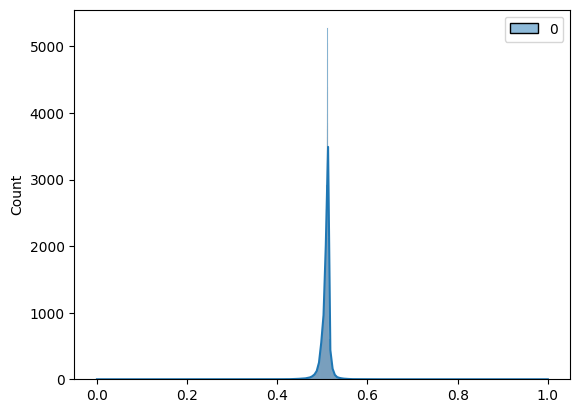

In [35]:
sns.histplot(normalised_data, kde=True)
plt.show()

In [36]:
field_to_be_scaled_with_min_max_scaler.append("pmDE")

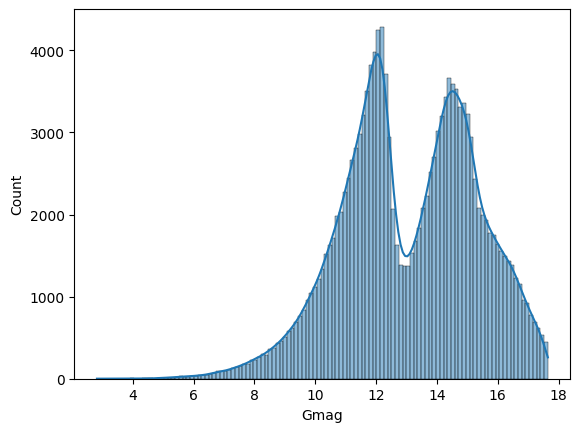

In [37]:
sns.histplot(df["Gmag"], kde=True)
plt.show()

In [38]:
normalised_data = MinMaxScaler().fit_transform(df["Gmag"].to_numpy().reshape(-1, 1))

<Axes: ylabel='Count'>

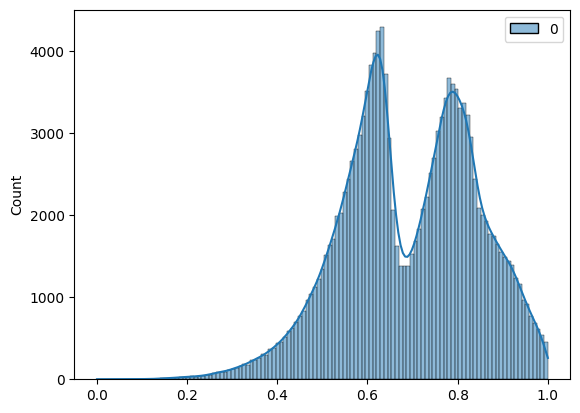

In [39]:
sns.histplot(normalised_data, kde=True)

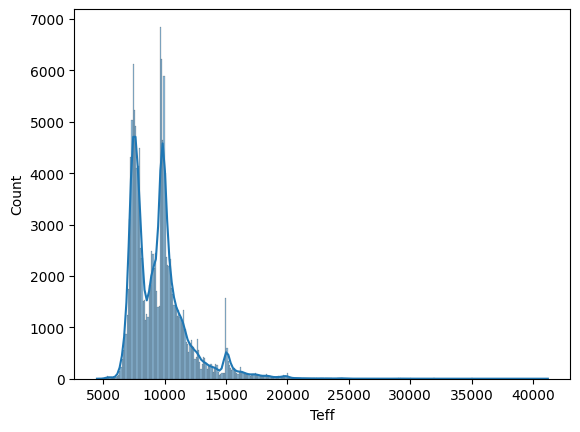

In [40]:
sns.histplot(df["Teff"], kde=True)
plt.show()

In [41]:
transformed = KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='kmeans', subsample=None).fit_transform(X=df["Teff"].to_numpy().reshape(-1, 1))

In [42]:
from collections import Counter
Counter(transformed.reshape(1, -1)[0])

Counter({1.0: 59614, 0.0: 59320, 2.0: 20745, 3.0: 8432, 4.0: 427})

In [43]:
fields_to_be_discretize.append("Teff")

In [44]:
field_to_be_scaled_with_min_max_scaler

['e_Gmag',
 'BPmag',
 'e_BPmag',
 'RPmag',
 'e_RPmag',
 'GRVSmag',
 'e_GRVSmag',
 'BP-RP',
 'BP-G',
 'G-RP',
 'pscol',
 'Dist',
 'Rad',
 'Lum-Flame',
 'Mass-Flame',
 'z-Flame',
 'RA_ICRS',
 'Plx',
 'PM',
 'pmRA',
 'pmDE']

In [45]:
field_to_be_scaled_with_standard_scaler

['DE_ICRS']

In [46]:
df = df.dropna(subset=["Source"]) #drop null

In [47]:
train, test = train_test_split(df, test_size=0.2)

In [48]:
X_train = train[field_to_be_scaled_with_standard_scaler + field_to_be_scaled_with_min_max_scaler + ["Teff", "Age-Flame",]]

In [49]:
X_test = test[field_to_be_scaled_with_standard_scaler + field_to_be_scaled_with_min_max_scaler + ["Teff", "Age-Flame"]]

In [50]:
target_encoder = OrdinalEncoder()

In [51]:
y_train = target_encoder.fit_transform(np.array([v for v in train["SpType-ELS"]]).reshape(-1, 1)) # SpType-ELS target binary encoding

In [52]:
y_test = target_encoder.transform(np.array([v for v in test["SpType-ELS"]]).reshape(-1, 1))

In [53]:
numeric_standard_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')), ("scaler", StandardScaler())]
)
numeric_min_max_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')), ("scaler", MinMaxScaler())]
)
numeric_discritizer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')), ("scaler", KBinsDiscretizer(n_bins=5, strategy='kmeans', encode='ordinal'))]
)
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OrdinalEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("min_max_scaling", numeric_standard_transformer, field_to_be_scaled_with_standard_scaler),
        ("standard_scaling", numeric_min_max_transformer, field_to_be_scaled_with_min_max_scaler),
        ("discretization", numeric_discritizer, ["Teff", "Age-Flame"]),
    ]
)

In [54]:
X_train = preprocessor.fit_transform(X_train)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

<h1>Selecting best hyper parameters</h1>

In [56]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

parameters = {
    "loss": ["log_loss", "exponential"],
    "learning_rate": [1.0, 2.0],
    "criterion": ["friedman_mse", "squared_error"]
}

clf = GridSearchCV(clf, param_grid=parameters, verbose=10)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START criterion=friedman_mse, learning_rate=1.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 1/8] END criterion=friedman_mse, learning_rate=1.0, loss=log_loss;, score=0.991 total time=  26.4s
[CV 2/5; 1/8] START criterion=friedman_mse, learning_rate=1.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 1/8] END criterion=friedman_mse, learning_rate=1.0, loss=log_loss;, score=0.991 total time=  26.3s
[CV 3/5; 1/8] START criterion=friedman_mse, learning_rate=1.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 1/8] END criterion=friedman_mse, learning_rate=1.0, loss=log_loss;, score=0.991 total time=  27.2s
[CV 4/5; 1/8] START criterion=friedman_mse, learning_rate=1.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 1/8] END criterion=friedman_mse, learning_rate=1.0, loss=log_loss;, score=0.992 total time=  26.5s
[CV 5/5; 1/8] START criterion=friedman_mse, learning_rate=1.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 1/8] END criterion=friedman_mse, learning_rate=1.0, loss=log_loss;, score=0.991 total time=  26.3s
[CV 1/5; 2/8] START criterion=friedman_mse, learning_rate=1.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 2/8] END criterion=friedman_mse, learning_rate=1.0, loss=exponential;, score=0.991 total time=  26.4s
[CV 2/5; 2/8] START criterion=friedman_mse, learning_rate=1.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 2/8] END criterion=friedman_mse, learning_rate=1.0, loss=exponential;, score=0.991 total time=  26.1s
[CV 3/5; 2/8] START criterion=friedman_mse, learning_rate=1.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 2/8] END criterion=friedman_mse, learning_rate=1.0, loss=exponential;, score=0.991 total time=  26.0s
[CV 4/5; 2/8] START criterion=friedman_mse, learning_rate=1.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 2/8] END criterion=friedman_mse, learning_rate=1.0, loss=exponential;, score=0.991 total time=  25.3s
[CV 5/5; 2/8] START criterion=friedman_mse, learning_rate=1.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 2/8] END criterion=friedman_mse, learning_rate=1.0, loss=exponential;, score=0.990 total time=  26.6s
[CV 1/5; 3/8] START criterion=friedman_mse, learning_rate=2.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 3/8] END criterion=friedman_mse, learning_rate=2.0, loss=log_loss;, score=0.929 total time=  26.3s
[CV 2/5; 3/8] START criterion=friedman_mse, learning_rate=2.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 3/8] END criterion=friedman_mse, learning_rate=2.0, loss=log_loss;, score=0.461 total time=  26.3s
[CV 3/5; 3/8] START criterion=friedman_mse, learning_rate=2.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 3/8] END criterion=friedman_mse, learning_rate=2.0, loss=log_loss;, score=0.956 total time=  26.5s
[CV 4/5; 3/8] START criterion=friedman_mse, learning_rate=2.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 3/8] END criterion=friedman_mse, learning_rate=2.0, loss=log_loss;, score=0.706 total time=  26.3s
[CV 5/5; 3/8] START criterion=friedman_mse, learning_rate=2.0, loss=log_loss....


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 3/8] END criterion=friedman_mse, learning_rate=2.0, loss=log_loss;, score=0.932 total time=  25.5s
[CV 1/5; 4/8] START criterion=friedman_mse, learning_rate=2.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 4/8] END criterion=friedman_mse, learning_rate=2.0, loss=exponential;, score=0.990 total time=  26.0s
[CV 2/5; 4/8] START criterion=friedman_mse, learning_rate=2.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 4/8] END criterion=friedman_mse, learning_rate=2.0, loss=exponential;, score=0.988 total time=  26.6s
[CV 3/5; 4/8] START criterion=friedman_mse, learning_rate=2.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 4/8] END criterion=friedman_mse, learning_rate=2.0, loss=exponential;, score=0.988 total time=  26.4s
[CV 4/5; 4/8] START criterion=friedman_mse, learning_rate=2.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 4/8] END criterion=friedman_mse, learning_rate=2.0, loss=exponential;, score=0.986 total time=  26.4s
[CV 5/5; 4/8] START criterion=friedman_mse, learning_rate=2.0, loss=exponential.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 4/8] END criterion=friedman_mse, learning_rate=2.0, loss=exponential;, score=0.988 total time=  27.2s
[CV 1/5; 5/8] START criterion=squared_error, learning_rate=1.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 5/8] END criterion=squared_error, learning_rate=1.0, loss=log_loss;, score=0.991 total time=  26.3s
[CV 2/5; 5/8] START criterion=squared_error, learning_rate=1.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 5/8] END criterion=squared_error, learning_rate=1.0, loss=log_loss;, score=0.991 total time=  25.4s
[CV 3/5; 5/8] START criterion=squared_error, learning_rate=1.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 5/8] END criterion=squared_error, learning_rate=1.0, loss=log_loss;, score=0.991 total time=  25.9s
[CV 4/5; 5/8] START criterion=squared_error, learning_rate=1.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 5/8] END criterion=squared_error, learning_rate=1.0, loss=log_loss;, score=0.992 total time=  26.4s
[CV 5/5; 5/8] START criterion=squared_error, learning_rate=1.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 5/8] END criterion=squared_error, learning_rate=1.0, loss=log_loss;, score=0.991 total time=  25.9s
[CV 1/5; 6/8] START criterion=squared_error, learning_rate=1.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 6/8] END criterion=squared_error, learning_rate=1.0, loss=exponential;, score=0.991 total time=  26.3s
[CV 2/5; 6/8] START criterion=squared_error, learning_rate=1.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 6/8] END criterion=squared_error, learning_rate=1.0, loss=exponential;, score=0.991 total time=  26.1s
[CV 3/5; 6/8] START criterion=squared_error, learning_rate=1.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 6/8] END criterion=squared_error, learning_rate=1.0, loss=exponential;, score=0.991 total time=  26.2s
[CV 4/5; 6/8] START criterion=squared_error, learning_rate=1.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 6/8] END criterion=squared_error, learning_rate=1.0, loss=exponential;, score=0.991 total time=  26.0s
[CV 5/5; 6/8] START criterion=squared_error, learning_rate=1.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 6/8] END criterion=squared_error, learning_rate=1.0, loss=exponential;, score=0.990 total time=  26.2s
[CV 1/5; 7/8] START criterion=squared_error, learning_rate=2.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 7/8] END criterion=squared_error, learning_rate=2.0, loss=log_loss;, score=0.929 total time=  26.6s
[CV 2/5; 7/8] START criterion=squared_error, learning_rate=2.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 7/8] END criterion=squared_error, learning_rate=2.0, loss=log_loss;, score=0.461 total time=  26.3s
[CV 3/5; 7/8] START criterion=squared_error, learning_rate=2.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 7/8] END criterion=squared_error, learning_rate=2.0, loss=log_loss;, score=0.956 total time=  26.3s
[CV 4/5; 7/8] START criterion=squared_error, learning_rate=2.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 7/8] END criterion=squared_error, learning_rate=2.0, loss=log_loss;, score=0.706 total time=  26.7s
[CV 5/5; 7/8] START criterion=squared_error, learning_rate=2.0, loss=log_loss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 7/8] END criterion=squared_error, learning_rate=2.0, loss=log_loss;, score=0.932 total time=  25.8s
[CV 1/5; 8/8] START criterion=squared_error, learning_rate=2.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 8/8] END criterion=squared_error, learning_rate=2.0, loss=exponential;, score=0.990 total time=  25.8s
[CV 2/5; 8/8] START criterion=squared_error, learning_rate=2.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 8/8] END criterion=squared_error, learning_rate=2.0, loss=exponential;, score=0.988 total time=  26.4s
[CV 3/5; 8/8] START criterion=squared_error, learning_rate=2.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 8/8] END criterion=squared_error, learning_rate=2.0, loss=exponential;, score=0.988 total time=  26.5s
[CV 4/5; 8/8] START criterion=squared_error, learning_rate=2.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 8/8] END criterion=squared_error, learning_rate=2.0, loss=exponential;, score=0.986 total time=  26.3s
[CV 5/5; 8/8] START criterion=squared_error, learning_rate=2.0, loss=exponential


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 8/8] END criterion=squared_error, learning_rate=2.0, loss=exponential;, score=0.988 total time=  26.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1.0,
                                                  max_depth=1, random_state=0),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [1.0, 2.0],
                         'loss': ['log_loss', 'exponential']},
             verbose=10)

In [57]:
clf.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'log_loss'}

<h1>Gradient boosting<h1>

In [58]:
gb_clf = GradientBoostingClassifier(**clf.best_params_)

In [59]:
gb_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1.0)

In [60]:
X_test = preprocessor.transform(X_test)

In [61]:
y_pred = gb_clf.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     16028
         1.0       0.99      0.99      0.99     13680

    accuracy                           0.99     29708
   macro avg       0.99      0.99      0.99     29708
weighted avg       0.99      0.99      0.99     29708



In [63]:
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1:], pos_label=1)

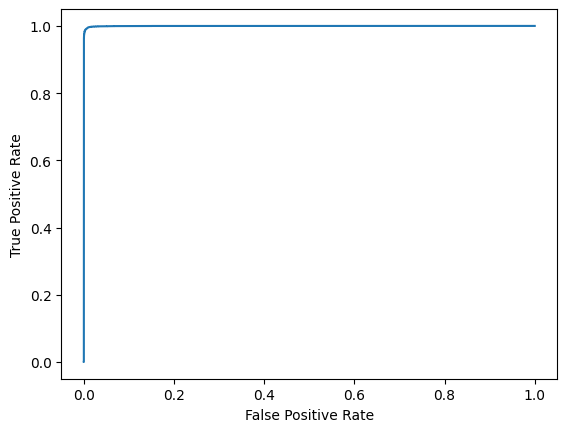

In [64]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [65]:
print(f"AUC score: {roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1:])}")

AUC score: 0.999580645237793


<Axes: >

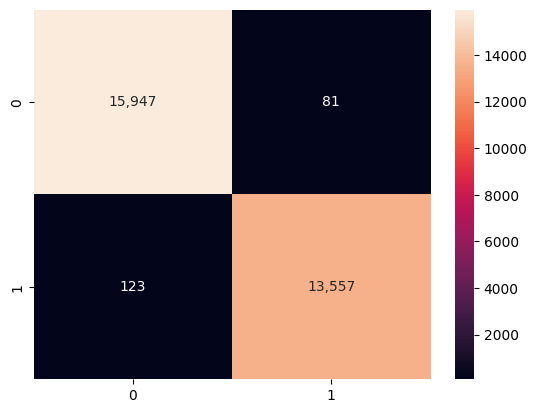

In [66]:
cf_matrix = confusion_matrix(y_test, gb_clf.predict(X_test))
sns.heatmap(cf_matrix, annot=True, fmt=',d')

<h1>Naive Bayes</h1>

In [67]:
knn_clf = GaussianNB()

In [68]:
knn_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [69]:
y_pred = knn_clf.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93     16028
         1.0       0.88      0.98      0.93     13680

    accuracy                           0.93     29708
   macro avg       0.93      0.93      0.93     29708
weighted avg       0.93      0.93      0.93     29708



In [71]:
fpr, tpr, thresholds = roc_curve(y_test, knn_clf.predict_proba(X_test)[:, 1], pos_label=1)

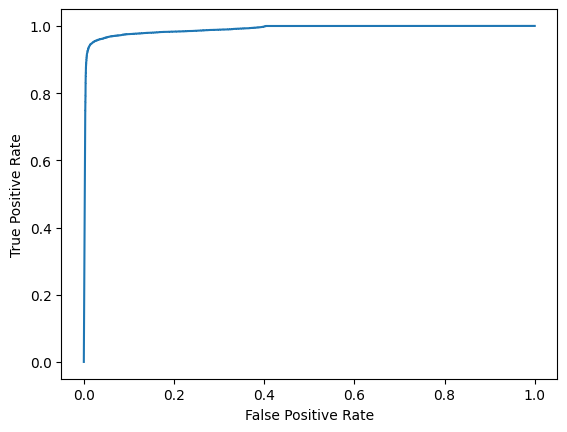

In [72]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [73]:
print(f"AUC score: {roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])}")

AUC score: 0.9898445173431875


<Axes: >

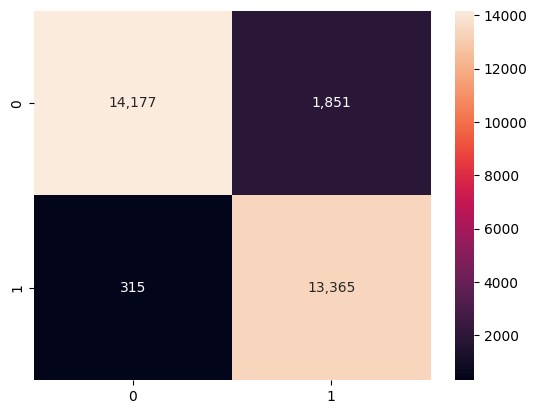

In [74]:
cf_matrix = confusion_matrix(y_test, knn_clf.predict(X_test))
sns.heatmap(cf_matrix, annot=True, fmt=',d')

<h1>Decision Tree</h1>

In [75]:
decision_clf = DecisionTreeClassifier()

In [76]:
decision_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
y_pred = decision_clf.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     16028
         1.0       0.99      0.99      0.99     13680

    accuracy                           0.99     29708
   macro avg       0.99      0.99      0.99     29708
weighted avg       0.99      0.99      0.99     29708



In [79]:
fpr, tpr, thresholds = roc_curve(y_test, decision_clf.predict_proba(X_test)[:, 1:], pos_label=1)

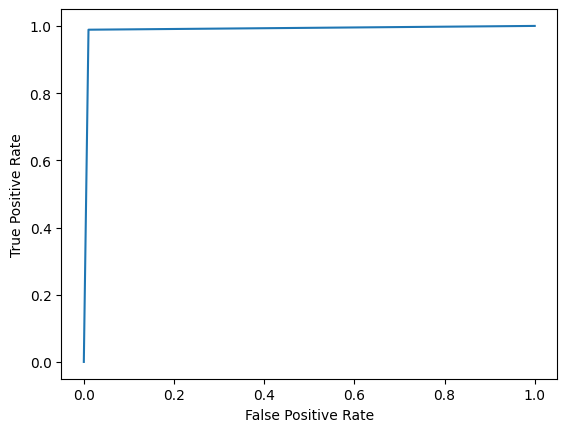

In [80]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [81]:
print(f"AUC score: {roc_auc_score(y_test, decision_clf.predict_proba(X_test)[:, 1:])}")

AUC score: 0.9891929072952742


<Axes: >

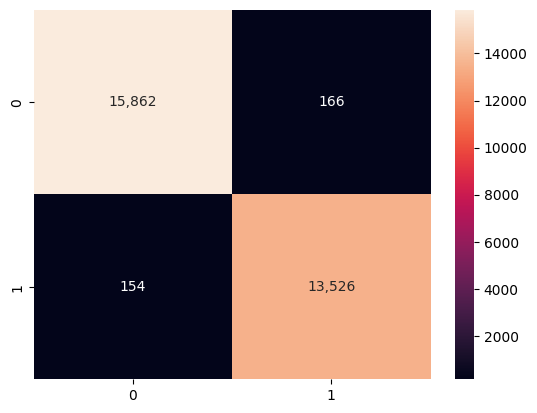

In [82]:
cf_matrix = confusion_matrix(y_test, decision_clf.predict(X_test))
sns.heatmap(cf_matrix, annot=True, fmt=',d')

In [83]:
df_unknown = pd.read_csv("/content/drive/MyDrive/dataGaia_AB_unknown 2.csv")

In [84]:
df_unknown.head()

,ID,Unnamed: 0,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,...,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame
0,119089,19089,64.085883,46.209497,2.340000e+17,0.3386,1.067,-0.841,-0.656,13.132349,...,0.272599,0.444520,NaN,11663.4,2031.7985,2.8537,239.107820,3.514,NaN,0.515510
1,24912,24912,14.701590,67.754101,5.270000e+17,1.6877,3.527,-1.976,-2.921,12.781258,...,0.504253,0.678857,NaN,7661.9,615.7902,1.7595,9.183199,1.665,0.749,0.661103
2,6264,6264,55.953330,38.656112,2.240000e+17,0.8378,8.216,6.574,-4.927,12.053966,...,0.196862,0.331098,NaN,7820.4,1254.6984,2.9247,23.100883,1.986,0.920,0.322678
3,81903,81903,91.211868,-14.372262,2.990000e+18,1.1175,12.945,7.306,10.687,11.559693,...,0.126262,0.251504,NaN,8984.8,890.9888,2.2170,26.935236,2.133,0.499,0.516520
4,110917,10917,75.949263,40.560254,2.010000e+17,0.9456,5.200,3.248,-4.061,15.013525,...,0.252923,0.483553,NaN,10195.4,5160.0750,3.3666,111.986990,2.916,0.319,0.441721


In [85]:
X_unknown = preprocessor.transform(df_unknown)

In [86]:
predictions = target_encoder.inverse_transform(gb_clf.predict(X_unknown).reshape(-1, 1)).reshape(1, -1)

In [87]:
df_unknown["SpType-ELS"] = predictions[0]

In [88]:
df_unknown[["ID", "SpType-ELS"]].to_csv("kaggle_results.csv", index=False)